In [1]:
from graphviz import Digraph

In [2]:
class rtrie:
    def __init__(self, c , v = None , enfant = [None]*26 ): # c : caractere , v : valeur , enfant : liste des enfants
        self.c = c
        self.v = v
        self.enfants = enfant

In [3]:
class RTrie:
    def __init__(self):
        self.racine = [None]*26
    
    def prem(self , mot): #retourne le caractere en int
        """RTrie * str -> int"""
        """Retourne la position du premier caractere du mot dans l'alphabet."""
        res = ord(mot[0])
        #print("le caractere", mot[0], "à la position", res-97)
        return res-97

    def reste(self , mot):
        """RTrie * str -> str"""
        """Retourne le reste du mot sans le premier caractere."""
        return mot[1:]


    def EnfantSauf(self, A, i):
        """RTrie * rtrie * int -> rtrie[]"""
        """Retourne la liste des enfants de A sauf celui d'indice i."""
        if A is None:
            return []
        res = []
        # cpt = 0
       # print("EnfantSauf : retourner les enfants sauf celui à la position ", i)
        for cpt in range(len(A.enfants)):
            if cpt == i:
                #if A.enfants[i] is not None :
                    #print("EnfantSauf, je dois ajouter la cle dans cet enfant avec la cle", A.enfants[i].c, "à la position", i)
                res.append(None)
                # cpt += 1
            else:
                res.append(self.duplique(A.enfants[cpt]))
                # cpt += 1

        return res



    def SousArbre(self, A, i):
        """RTrie * rtrie * int -> rtrie"""
        """Renvoie une copie du i-eme sous arbre de A"""
        # print("SOUS ARBRE ????????",A.c ," et ", A.v , " et len", len(A.enfants))
        if A.enfants[i] is None :
            # print("SOUS ARBRE - Sous arbre vide")
            return None
        return self.duplique(A.enfants[i])


    def R_Trie(self, c, v, i , L , A): # i : entier , L : liste , A : R-Trie
        """RTrie * str * int * int * rtrie[] * rt -> rtrie"""
        """ Renvoie le trie construit a partir de L en inserant A a la i-eme position,
            en ajoutant la lettre c comme cle et la valeur v
        """
        #Pas besoin de dupliquer L car elle est deja dupliquee dans la methode EnfantSauf
        # char = chr(i+97) # retourne le caractere en minuscule correspondant à l'entier
        #print("RTRIE ajout de la lettre ", c, i)
        res = rtrie(c, v)
        res.enfants = L
        res.enfants[i] = A
        # if A is not None :
        #     # res.enfants[i] = self.duplique(A)
        #     res.enfants[i] = A
        # else:
        #     res.enfants[i] = None
        return res
    

        
    def duplique(self,A):
        """RTrie * rtrie -> rtrie"""
        """Renvoie une copie de A."""
        if A is None :
            return None
        else:
            res = rtrie(A.c, A.v)
            res.enfants = [None]*26
            for i in range(len(A.enfants)):
                #if A.enfants[i] is not None :
                    #print("duplique enfant A non nul : ", i, A.enfants[i].c)
                res.enfants[i] = self.duplique(A.enfants[i])
            return res




    def ajout(self, c, v ) : # c : cle, v : valeur
        """RTrie * str * RTrie * -> rtrie"""
        """Ajoute un mot dans l'arbre R-Trie."""
        p = self.prem(c)
        self.racine[p] = self._ajout(c, self.racine[p], v)
        return self.racine



    def _ajout(self, c , A , v ) : # c : cle , A : R-Trie , v : valeur
        """RTrie * str * rtrie * -> rtrie"""
        """Ajoute un mot dans l'arbre R-Trie."""
        #print("ajout en cours de ", c)
        if A is None :
            A = rtrie(c)
            
        if len(c) == 1 :
            #print("ajout de la derniere lettre ", c[0] , " avec valeur ", v)
            A.v = v
            return A
            # return rtrie(c,v)

        # p = self.prem(c)
        suivant = self.reste(c)[0]
        psuiv = self.prem(suivant)
        #print("valeur de p :", self.prem(c), "pour la lettre ", c[0] , " et valeur v :", v, " et son type ", type(A.enfants))
        return self.R_Trie(c[0], A.v, psuiv, self.EnfantSauf(A, psuiv), self._ajout(self.reste(c),self.SousArbre(A,psuiv),v))



    

    def recherche(self, mot):
        """RTrie * str -> bool"""
        """Recherche un mot dans l'arbre R-Trie."""
        p = self.prem(mot)
        return self._recherche(mot, self.racine[p])
    

    def _recherche(self, mot, noeud):
        """RTrie * str * rtrie -> bool"""
        """Recherche un mot dans l'arbre R-Trie."""
        if noeud is None:
            return False

        if len(mot) == 1 and noeud.c == mot : # Si nous sommes à la fin du mot et il contient une valeur 
            return noeud.v is not None

        p = self.prem(mot)
        return self._recherche(self.reste(mot), noeud.enfants[p])




    def supprime(self, mot):
        """RTrie * str -> rtrie"""
        """Supprime un mot de l'arbre R-Trie."""
        p = self.prem(mot)
        self.racine[p] = self._supprime(mot, self.racine[p])
        return self.racine
    
    # R_Trie(self, c, v, i , L , A)
    def _supprime(self, mot, noeud):
        """RTrie * str * rtrie -> rtrie"""
        """Supprime un mot de l'arbre R-Trie."""
        res = noeud
        if res is None:
            return None 
        
        if len(mot) < 1:
            return res

        p = self.prem(mot)

        if len(mot) == 1:
            if res.v is not None and mot[0] == res.c:
                res.v = None
            else : # ICI LE PRB ?
                # suivant = self.reste(mot)[0]
                # psuiv = self.prem(suivant)
                # res = self.R_Trie(mot[0], res.v,  psuiv, self.EnfantSauf(noeud, psuiv), self._supprime(self.reste(mot), self.SousArbre(noeud, psuiv)))
                res.enfants[p] = self._supprime(self.reste(mot), res.enfants[p])    
                
        elif len(mot) > 1 :
            suivant = self.reste(mot)[0]
            psuiv = self.prem(suivant)
            res = self.R_Trie(mot[0], res.v,  psuiv, self.EnfantSauf(noeud, psuiv), self._supprime(self.reste(mot), self.SousArbre(noeud, psuiv)))
            # OK ? RIPP??
            # res.enfants[p] = self._supprime(self.reste(mot), res.enfants[p])
            # res.enfants = self.EnfantSauf(res, p) # OK aussi ? RIP??
            
        # Cas de suppression de noeud inutile
        if mot[0]==res.c and self.contientNone(res.enfants) and res.v is not None:
            return res
        
        
        
        if mot[0]==res.c and self.contientNone(res.enfants):
            return None
        


        # # Cas de suppression de noeud inutile
        # if res.v is None and self.contientNone(res.enfants):
        #     return None

        return res
    
    


    # def _supprime(self, mot, noeud):
    #     """RTrie * str *  """
    #     """Supprime un mot de l'arbre R-Trie."""
    #     res = noeud
    #     #ok = False
    #     if res is None:
    #         return None 
        
    #     if len(mot) < 1:
            
    #         return res

    #     p = self.prem(mot)

    #     if len(mot) == 1:
    #         if res.v is not None and mot == res.c:
    #             res.v = None
    #             #ok = True
    #             if self.contientNone(res.enfants):
    #                 return None
    #         # elif self.contientNone(res.enfants) :
    #         #     res = self.R_Trie(p, self.EnfantSauf(noeud, p), None)
    #         else :
    #             res = self.R_Trie(p, self.EnfantSauf(noeud, p), self._supprime(self.reste(mot), self.SousArbre(noeud, p)))

    #     elif len(mot) > 1 :
    #         res = self.R_Trie(p, self.EnfantSauf(noeud, p), self._supprime(self.reste(mot), self.SousArbre(noeud, p)))

    #     # Cas de suppression de noeud inutile
    #     if res.v is None and self.contientNone(res.enfants):
    #         return None

    #     return res



    def contientNone(self, noeud):
        """RTrie * rtrie -> bool"""
        """Vérifie si un noeud contient que des None"""
        for enfant in noeud:
            if enfant is not None:
                return False
        return True



    def afficher_mots(self, noeud=None, mot=''):
        """Affiche tous les mots présents dans l'arbre R-Trie."""
        if noeud is None:
            noeud = self.racine

        for i, enfant in enumerate(noeud):
            if enfant is not None:
                # Si nous sommes à la fin d'un mot, affichons le mot
                if enfant.v is not None:
                    print(mot + chr(i + 97))
                # Sinon, continuons à parcourir l'arbre
                self.afficher_mots(enfant.enfants, mot + chr(i + 97))





    def visualiser_arbre(self):
        dot = Digraph()

        def generer_graphique(arbre, parent_label=''):
            if arbre is not None:
                for enfant in arbre:
                    if enfant is not None:
                        #print("ENFANT ", enfant.c)
                        enfant_label = f"{enfant.c}_{id(enfant)}"
                        dot.node(enfant_label, label=f"{enfant.v if enfant.v is not None else ''}")
                        if parent_label is not None:
                            #print("LIAISON ", enfant.c , " AVEC : ", parent_label)
                            dot.edge(parent_label, enfant_label, label=f" {enfant.c}") # 

                        generer_graphique(enfant.enfants, enfant_label)

        # Noeud racine
        dot.node("racine", label="")

        for enfant in self.racine:
            if enfant is not None:
               generer_graphique([enfant], "racine")

        return dot



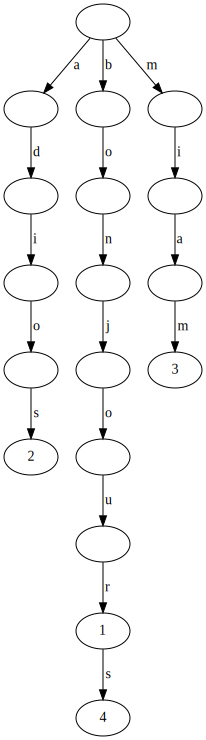

In [4]:
rtrie1 = RTrie()
rtrie1.ajout("bonjour", 1)
rtrie1.ajout("adios", 2)
rtrie1.ajout("miam", 3)
rtrie1.ajout("bonjours", 4)

# print("PRESENCE du mot bonjour : ", rtrie1.recherche("bonjour"))
# rtrie1.racine = rtrie1.supprime("bonjour")
# print("PRESENCE du mot bonjour : ", rtrie1.recherche("bonjour"))

#rtrie1.racine = rtrie1.supprime("bonjours")

rtrie1.visualiser_arbre()

-------------------
PRESENCE DU MOT bonjour :  False
PRESENCE DU MOT bonjours :  False
PRESENCE DU MOT bonsoir :  False
PRESENCE DU MOT zebre :  False


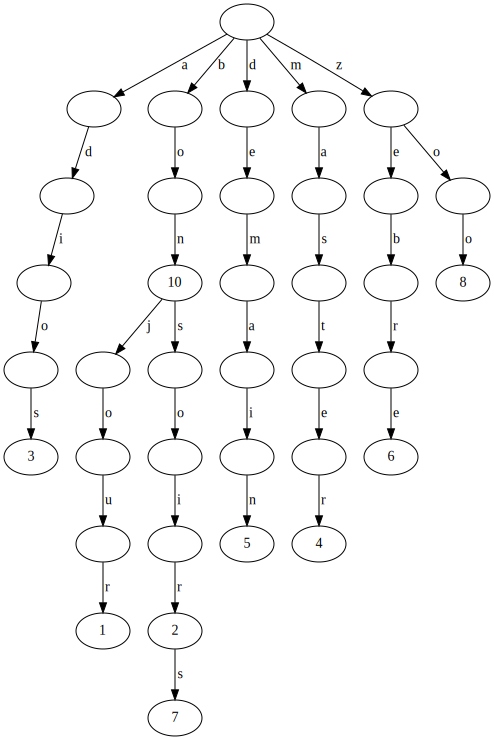

In [5]:
rt = RTrie()
rt.racine = rt.ajout("bonjour", 1)

rt.racine = rt.ajout("bonsoir", 2)

rt.racine = rt.ajout("adios", 3)

rt.racine = rt.ajout("master", 4)

rt.racine = rt.ajout("demain", 5)

rt.racine = rt.ajout("zebre", 6) # PRB JSP PQ

rt.racine = rt.ajout("bonsoirs", 7)

rt.racine = rt.ajout("zoo", 8)
rt.racine = rt.ajout("bon", 10)

rt.racine = rt.ajout("adio", 11)

# rt.visualiser_arbre()

# rt.racine = rt.ajout("table", 7)

# rt.racine = rt.ajout("tata", 9)

# rt.racine = rt.ajout("tabless", 10)

print("-------------------")

# rt.afficher_mots()

# print("-------------------")

print("PRESENCE DU MOT bonjour : ",rt.recherche("bonjour"))

print("PRESENCE DU MOT bonjours : ",rt.recherche("bonjours"))

print("PRESENCE DU MOT bonsoir : ",rt.recherche("bonsoir"))

print("PRESENCE DU MOT zebre : ",rt.recherche("zebre"))

# print("-------------------")

# rt.visualiser_arbre()

# print("---------SUPPRIME----------")

rt.racine = rt.supprime("adio")

# rt.afficher_mots()

rt.visualiser_arbre()

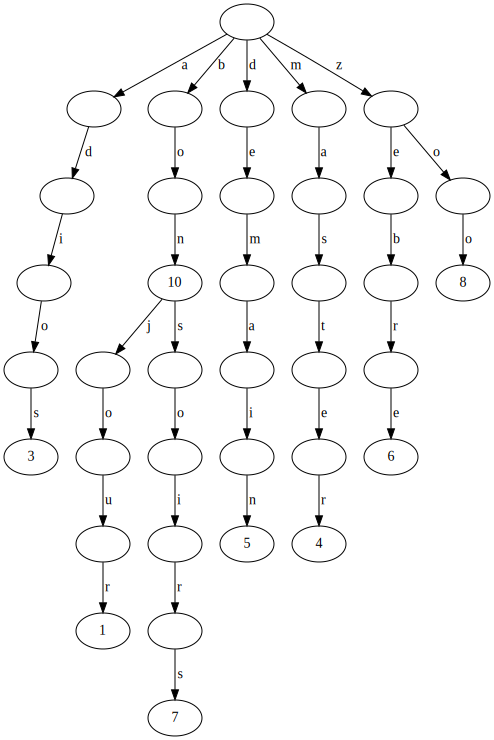

In [6]:
# rt.racine = rt.supprime("bonsoirs")
rt.racine = rt.supprime("bonsoir")
rt.visualiser_arbre()